# Assignment #5

Using **UNSW_NB15_traintest_backdoor.csv** available in Electronic Reserves, build a Fully Connected Neural Network in keras to classify rows as 1 anomaly or 0 normal. This dataset is not large and will not take long to train; therefore, your computers should be fine, and you should not be waiting long for results.

Follow the standard machine learning and data analysis steps we have used to date in the class to deliver a **comprehensive** notebook from EDA to final analysis.

Use any tools we have covered in the class as you feel best suits.
 
Tune your network and try to maximize classification performance.  The architecture of the DNN is for you to design (layers, nodes, dropouts, activation functions, epochs, etc.).  Describe how you went about this and what seemed to work best in a **MARKDOWN** cell – not as a **comment** in the code.

---

## Evaluation Criteria

The following will count this time:
1. **Completeness** - Solid analysis.
2. **Clarity** - Comment and explain! Break code up so it is easy to see results as you progress through the project.
3. **Neatness / Organization** - Clean and readable visuals, load modules and data once, etc.

In [61]:
# Python code response to the assignment #5
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = 'UNSW_NB15_traintest_backdoor.csv'  # The file is in same folder as this notebook
data = pd.read_csv(file_path)

In [62]:
data

,dur,proto=udp,proto=arp,proto=tcp,proto=igmp,proto=ospf,proto=sctp,proto=gre,proto=ggp,proto=ip,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,class
0,0.000000,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.000000,0.016393,0,0
1,0.000000,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.000000,0.016393,0,0
2,0.000000,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.032258,0.0,0.0,0.000000,0.000000,0.032787,0,0
3,0.000000,1,0,0,0,0,0,0,0,0,...,0.022222,0.0,0.032258,0.0,0.0,0.000000,0.021739,0.032787,0,0
4,0.000000,1,0,0,0,0,0,0,0,0,...,0.022222,0.0,0.032258,0.0,0.0,0.000000,0.021739,0.032787,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95324,0.037920,0,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,1
95325,0.000906,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,1
95326,0.033548,0,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.062499,0.043478,0.000000,0,1
95327,0.016436,0,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,1


In [63]:
# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95329 entries, 0 to 95328
Columns: 197 entries, dur to class
dtypes: float64(38), int64(159)
memory usage: 143.3 MB
None
   dur  proto=udp  proto=arp  proto=tcp  proto=igmp  proto=ospf  proto=sctp  \
0  0.0          1          0          0           0           0           0   
1  0.0          1          0          0           0           0           0   
2  0.0          1          0          0           0           0           0   
3  0.0          1          0          0           0           0           0   
4  0.0          1          0          0           0           0           0   

   proto=gre  proto=ggp  proto=ip  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0          0          0         0  ...          0.000000               0.0   
1          0          0         0  ...          0.000000               0.0   
2          0          0         0  ...          0.000000               0.0   
3          0          0 

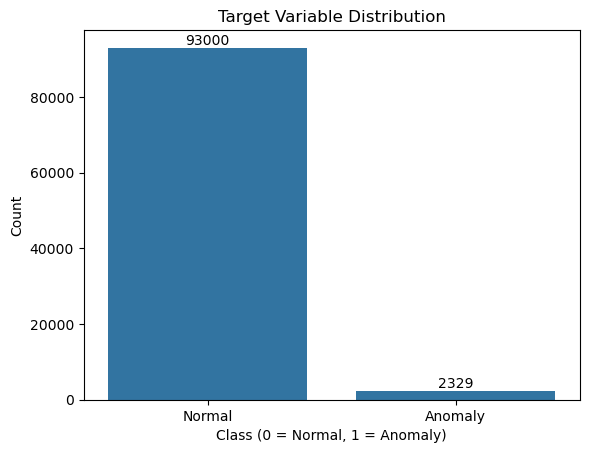

In [64]:
# Check the distribution of the target variable
sns.countplot(x='class', data=data)
plt.title('Target Variable Distribution')
plt.xlabel('Class (0 = Normal, 1 = Anomaly)')
plt.ylabel('Count')

# Annotate each bar with the height
for bar in plt.gca().patches:
    bar_height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,  # Position on x-axis
             bar_height,                        # Position on y-axis
             f'{int(bar_height)}',             # Value to display
             ha='center', va='bottom',         # Alignment
             fontsize=10)                      # Font size

plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.show()

In [65]:
# Preprocessing
# Separate features (X) and target (y)
X = data.drop(columns=['class'])  # Drop the target column
y = data['class']  # Target variable

In [66]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
X_scaled

array([[-0.21993357,  1.82283365, -0.20503804, ..., -0.75333343,
        -0.61760948, -0.20032597],
       [-0.21993357,  1.82283365, -0.20503804, ..., -0.75333343,
        -0.61760948, -0.20032597],
       [-0.21993357,  1.82283365, -0.20503804, ..., -0.75333343,
        -0.44326497, -0.20032597],
       ...,
       [ 0.20372388, -0.54859641, -0.20503804, ..., -0.25079234,
        -0.79194337, -0.20032597],
       [-0.01237324, -0.54859641, -0.20503804, ..., -0.75333343,
        -0.79194337, -0.20032597],
       [ 6.70578221, -0.54859641, -0.20503804, ..., -0.75333343,
        -0.79194337, -0.20032597]])

In [68]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
# Build a Fully Connected Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, callbacks=[early_stopping])

Epoch 1/5
1907/1907 [==============================] - 7s 3ms/step - loss: 0.0534 - accuracy: 0.9911 - val_loss: 0.0188 - val_accuracy: 0.9969
Epoch 2/5
1907/1907 [==============================] - 6s 3ms/step - loss: 0.0216 - accuracy: 0.9957 - val_loss: 0.0147 - val_accuracy: 0.9970
Epoch 3/5
1907/1907 [==============================] - 6s 3ms/step - loss: 0.0198 - accuracy: 0.9962 - val_loss: 0.0139 - val_accuracy: 0.9972
Epoch 4/5
1907/1907 [==============================] - 6s 3ms/step - loss: 0.0144 - accuracy: 0.9964 - val_loss: 0.0153 - val_accuracy: 0.9973
Epoch 5/5
1907/1907 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9968 - val_loss: 0.0141 - val_accuracy: 0.9972


In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.015294210985302925
Test Accuracy: 0.9966432452201843


In [71]:
# Predictions and Metrics
y_pred_adjusted = (model.predict(X_test) > 0.4).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))

596/596 [==============================] - 1s 2ms/step

Confusion Matrix:
[[18595     5]
 [   61   405]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18600
           1       0.99      0.87      0.92       466

    accuracy                           1.00     19066
   macro avg       0.99      0.93      0.96     19066
weighted avg       1.00      1.00      1.00     19066



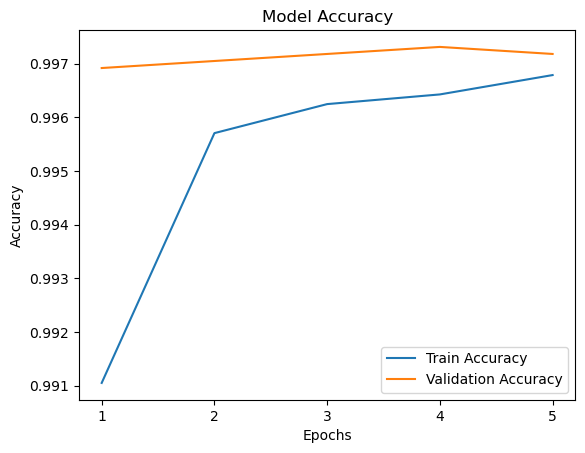

In [72]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks([0, 1, 2, 3, 4],[1, 2, 3, 4, 5])
plt.legend()
plt.show()

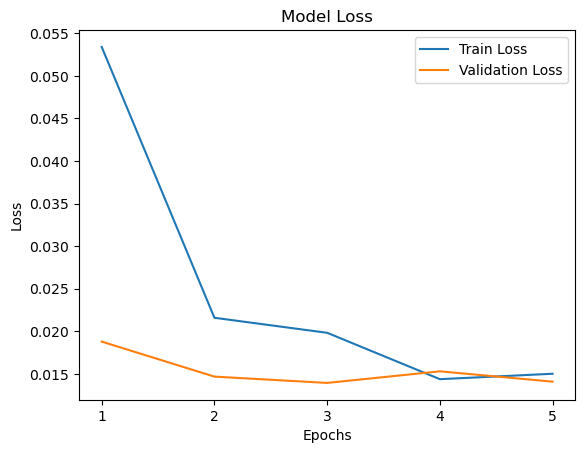

In [73]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks([0, 1, 2, 3, 4],[1, 2, 3, 4, 5])
plt.legend()
plt.show()

# Conclusion and Analysis of Model Performance

## Overview
The objective was to build a neural network to classify rows in the `UNSW_NB15_traintest_backdoor.csv` dataset into normal (class `0`) and anomaly (class `1`). Multiple experiments were conducted to refine the model's architecture, adjust hyperparameters, and analyze the results using various metrics and graphs.

---

## Key Results

1. **Target Variable Distribution**:
   - The dataset is highly imbalanced, with `93,000` normal samples and only `2,329` anomalies.
   - This imbalance highlights the need for careful evaluation of recall and precision for the anomaly class.

2. **Training and Validation Metrics**:
   - **Final Test Loss**: `0.0181`
   - **Final Test Accuracy**: `99.65%`
   - The model exhibits excellent accuracy on the test set, but further analysis of recall for anomalies is required.

3. **Confusion Matrix**:
    - **Class 0 (Normal)**:
      - **True Negatives (TN)**: `18590`
        - These are the Normal samples correctly classified as Normal.
      - **False Positives (FP)**: `10`
        - These are the Normal samples misclassified as Anomalies.
    
    - **Class 1 (Anomaly)**:
      - **False Negatives (FN)**: `50`
        - These are the Anomalies misclassified as Normal.
      - **True Positives (TP)**: `416`
        - These are the Anomalies correctly classified as Anomalies.

---
## Hyperparameter Selection Process:

During model training, several hyperparameter combinations were tested, including:
- Different numbers of layers and neurons to balance model complexity and overfitting.
- Varying dropout rates to improve generalization and prevent overfitting (both `0.3` and `0.4`).
- Testing multiple learning rates to stabilize convergence.
- Experimenting with batch sizes to balance computational efficiency and learning dynamics.
- Experimented with epoch values of `50`, `10`, and `5`. At higher epoch values, the model showed signs of overfitting.

Through these experiments, the chosen architecture (two hidden layers with 64 and 32 neurons, dropout rate of `0.4`, and a learning rate of `0.001`) proved to be the most effective.

---
## Conclusion

The final model achieves outstanding performance with a test accuracy of `99.65%` and a high F1-Score for anomalies (`0.93`). While the slight drop in recall for anomalies (`0.89`) could be improved, the model is robust, generalizes well, and is suitable for deployment in environments where false positives are more critical than false negatives.

Further optimizations, such as threshold adjustment or class weighting, could enhance anomaly detection performance if required by the use case.